In [92]:
import pandas as pd
import numpy as np
import pymysql
import psycopg2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import configparser
config = configparser.ConfigParser()
config.read('config.ini')
config.sections()

['SOS_DB', 'docdx_db_production']

In [3]:
sos_db_section = config['SOS_DB']
host = sos_db_section['host']
user = sos_db_section['user']
password = sos_db_section['password']
db=sos_db_section['db']
port = int(sos_db_section.get('port', 3306))
db = pymysql.connect(host=host, user=user, password=password, db=db, port=port)

import_db_section = config['docdx_db_production']
host = import_db_section['host']
user = import_db_section['user']
password = import_db_section['password']
db_dx=import_db_section['db']
port = int(sos_db_section.get('port',5432))

conn_str = "host={} dbname={} user={} password={}".format(host, db_dx, user, password)
db_docdx = psycopg2.connect(conn_str)

__time spent:__

every day - consider a session
from topic_view
to answer a question 
to view a program 

From the first event to last event - user level/by day

In [17]:
#every user view the first topic by day(as a session)
tv_query = """SELECT t.viewed_at::date date, t.user_id, spe.name spe, sub.name subspe, min(t.viewed_at) tv_time FROM topic_view t
JOIN public."user_profile" up
ON t.user_id = up.user_id
JOIN specialty spe
ON spe.id = up.specialty_id
JOIN subspecialty sub
ON sub.id = up.subspecialty_id 
WHERE t.viewed_at::date >= '2018-08-01'
GROUP BY t.viewed_at::date, t.user_id, spe.name , sub.name """
tv_first = pd.read_sql(tv_query, db_docdx )

In [21]:
tv_first.head(10)

,date,user_id,spe,subspe,tv_time
0,2018-08-01,475599,Dermatology,Dermatology,2018-08-01 17:22:59.506000+00:00
1,2018-08-01,476565,Cardiology,Interventional Cardiology,2018-08-01 14:49:13.058000+00:00
2,2018-08-01,476623,Dermatology,Dermatology,2018-08-01 11:22:45.916000+00:00
3,2018-08-01,477613,Pulmonology,Pulmonary Disease,2018-08-01 14:17:02.147000+00:00
4,2018-08-01,478392,Oncology / Hematology,Hematology/Oncology,2018-08-01 10:14:44.514000+00:00
5,2018-08-01,479134,Anesthesia / Pain,Pain Management (Anesthesiology),2018-08-01 14:32:52.822000+00:00
6,2018-08-01,479166,Ophthalmology / Optometrists,Ophthalmology,2018-08-01 21:41:23.142000+00:00
7,2018-08-01,479637,Dermatology,Dermatology,2018-08-01 03:09:01.693000+00:00
8,2018-08-01,483481,Cardiology,Cardiovascular Disease,2018-08-01 12:01:33.824000+00:00
9,2018-08-01,483925,Ophthalmology / Optometrists,Ophthalmology,2018-08-01 21:46:33.114000+00:00


In [19]:
#every user view the last topic view by day(as a session)
tv_query_last = """SELECT t.viewed_at::date date, t.user_id, spe.name spe, sub.name subspe, max(t.viewed_at) tv_time FROM topic_view t
JOIN public."user_profile" up
ON t.user_id = up.user_id
JOIN specialty spe
ON spe.id = up.specialty_id
JOIN subspecialty sub
ON sub.id = up.subspecialty_id 
WHERE t.viewed_at::date >= '2018-08-01'
GROUP BY t.viewed_at::date, t.user_id, spe.name , sub.name """
tv_last = pd.read_sql(tv_query_last, db_docdx )

In [22]:
tv_last.head()

,date,user_id,spe,subspe,tv_time
0,2018-08-01,475599,Dermatology,Dermatology,2018-08-01 17:22:59.506000+00:00
1,2018-08-01,476565,Cardiology,Interventional Cardiology,2018-08-01 14:49:13.058000+00:00
2,2018-08-01,476623,Dermatology,Dermatology,2018-08-01 11:22:47.695000+00:00
3,2018-08-01,477613,Pulmonology,Pulmonary Disease,2018-08-01 14:23:26.621000+00:00
4,2018-08-01,478392,Oncology / Hematology,Hematology/Oncology,2018-08-01 10:20:52.474000+00:00


In [29]:
#every user answer the first question by day(as a session)
ans_query_first = """SELECT c.created_at::date date, c.created_by user_id, spe.name spe, sub.name subspe, min(c.created_at) ans_time FROM comment c
JOIN public."user_profile" up
ON c.created_by = up.user_id
JOIN specialty spe
ON spe.id = up.specialty_id
JOIN subspecialty sub
ON sub.id = up.subspecialty_id 
WHERE c.created_at::date >= '2018-08-01' and c.deleted_at is null and c.reply_to_comment_id is null 
GROUP BY c.created_at::date, c.created_by, spe.name , sub.name 
order by date, user_id"""
ans_first = pd.read_sql(ans_query_first, db_docdx )

In [31]:
ans_first.head()

,date,user_id,spe,subspe,ans_time
0,2018-08-01,477613,Pulmonology,Pulmonary Disease,2018-08-01 14:23:01.264000+00:00
1,2018-08-01,478392,Oncology / Hematology,Hematology/Oncology,2018-08-01 10:18:44.383000+00:00
2,2018-08-01,486153,Internal Medicine,Internal Medicine,2018-08-01 01:46:26.412000+00:00
3,2018-08-01,486403,Oncology / Hematology,Hematology/Oncology,2018-08-01 16:44:47.997000+00:00
4,2018-08-01,486795,Internal Medicine,Internal Medicine,2018-08-01 15:27:29.014000+00:00


In [32]:
#every user answer the last question by day(as a session)
ans_query_last = """SELECT c.created_at::date date, c.created_by user_id, spe.name spe, sub.name subspe, max(c.created_at) ans_time FROM comment c
JOIN public."user_profile" up
ON c.created_by = up.user_id
JOIN specialty spe
ON spe.id = up.specialty_id
JOIN subspecialty sub
ON sub.id = up.subspecialty_id 
WHERE c.created_at::date >= '2018-08-01' and c.deleted_at is null and c.reply_to_comment_id is null 
GROUP BY c.created_at::date, c.created_by, spe.name , sub.name 
order by date, user_id"""
ans_last = pd.read_sql(ans_query_last, db_docdx )

In [33]:
ans_last.head()

,date,user_id,spe,subspe,ans_time
0,2018-08-01,477613,Pulmonology,Pulmonary Disease,2018-08-01 14:23:01.264000+00:00
1,2018-08-01,478392,Oncology / Hematology,Hematology/Oncology,2018-08-01 10:18:44.383000+00:00
2,2018-08-01,486153,Internal Medicine,Internal Medicine,2018-08-01 01:46:26.412000+00:00
3,2018-08-01,486403,Oncology / Hematology,Hematology/Oncology,2018-08-01 16:44:47.997000+00:00
4,2018-08-01,486795,Internal Medicine,Internal Medicine,2018-08-01 15:29:58.478000+00:00


In [116]:
def df_concat(df, columns):
    output = pd.concat(df).sort_values(columns)
    final_output = output.drop_duplicates(subset = columns).reset_index(drop = True)
    return final_output

In [37]:
ans_all = pd.concat([ans_first, ans_last]).sort_values(['date','user_id','ans_time'])

In [40]:
ans_all_copy = ans_all.copy()

In [42]:
ans_all_clean = ans_all.drop_duplicates(subset = ['date','user_id','ans_time']).reset_index(drop = True)

In [44]:
ans_all_clean.head()

,date,user_id,spe,subspe,ans_time
0,2018-08-01,477613,Pulmonology,Pulmonary Disease,2018-08-01 14:23:01.264000+00:00
1,2018-08-01,478392,Oncology / Hematology,Hematology/Oncology,2018-08-01 10:18:44.383000+00:00
2,2018-08-01,486153,Internal Medicine,Internal Medicine,2018-08-01 01:46:26.412000+00:00
3,2018-08-01,486403,Oncology / Hematology,Hematology/Oncology,2018-08-01 16:44:47.997000+00:00
4,2018-08-01,486795,Internal Medicine,Internal Medicine,2018-08-01 15:27:29.014000+00:00


In [45]:
tv_all = pd.concat([tv_first, tv_last]).sort_values(['date','user_id','tv_time'])
tv_all_copy = tv_all.copy()

In [46]:
tv_all_clean = tv_all.drop_duplicates(subset = ['date','user_id','tv_time']).reset_index(drop = True)
tv_all_clean.head()

,date,user_id,spe,subspe,tv_time
0,2018-08-01,475599,Dermatology,Dermatology,2018-08-01 17:22:59.506000+00:00
1,2018-08-01,476565,Cardiology,Interventional Cardiology,2018-08-01 14:49:13.058000+00:00
2,2018-08-01,476623,Dermatology,Dermatology,2018-08-01 11:22:45.916000+00:00
3,2018-08-01,476623,Dermatology,Dermatology,2018-08-01 11:22:47.695000+00:00
4,2018-08-01,477613,Pulmonology,Pulmonary Disease,2018-08-01 14:17:02.147000+00:00


In [47]:
len(tv_all_clean)

67928

In [48]:
len(ans_all_clean)

29064

In [51]:
ans_all_clean.columns

Index(['date', 'user_id', 'spe', 'subspe', 'ans_time'], dtype='object')

In [49]:
tv_all_clean_copy = tv_all_clean.copy()
ans_all_clean_copy = ans_all_clean.copy()

In [52]:
tv_all_clean.columns = ['date', 'user_id', 'spe', 'subspe', 'time']
ans_all_clean.columns = ['date', 'user_id', 'spe', 'subspe', 'time']

In [53]:
event_all = pd.concat([tv_all_clean, ans_all_clean]).sort_values(['date','user_id','time'])

In [55]:
event_all.head()

,date,user_id,spe,subspe,time
0,2018-08-01,475599,Dermatology,Dermatology,2018-08-01 17:22:59.506000+00:00
1,2018-08-01,476565,Cardiology,Interventional Cardiology,2018-08-01 14:49:13.058000+00:00
2,2018-08-01,476623,Dermatology,Dermatology,2018-08-01 11:22:45.916000+00:00
3,2018-08-01,476623,Dermatology,Dermatology,2018-08-01 11:22:47.695000+00:00
4,2018-08-01,477613,Pulmonology,Pulmonary Disease,2018-08-01 14:17:02.147000+00:00


In [65]:
#get every day max time and min time 
#event_all.groupby(['date','user_id'])['time'].agg(['max','min'])
compare = pd.DataFrame(event_all.groupby(['date','user_id','spe','subspe'])['time'].apply(lambda g: g.max() - g.min()))

In [78]:
#compare = compare.reset_index()
compare.head()

,date,user_id,spe,subspe,time
0,2018-08-01,475599,Dermatology,Dermatology,00:00:00
1,2018-08-01,476565,Cardiology,Interventional Cardiology,00:00:00
2,2018-08-01,476623,Dermatology,Dermatology,00:00:01.779000
3,2018-08-01,477613,Pulmonology,Pulmonary Disease,00:06:24.474000
4,2018-08-01,478392,Oncology / Hematology,Hematology/Oncology,00:06:07.960000


In [85]:
int(compare.time[0].seconds/60)

0

In [86]:
compare['delta_min'] = compare.time.apply(lambda x: int(x.seconds/60))

In [115]:
compare.head()

,date,user_id,spe,subspe,time,delta_min
0,2018-08-01,475599,Dermatology,Dermatology,00:00:00,0
1,2018-08-01,476565,Cardiology,Interventional Cardiology,00:00:00,0
2,2018-08-01,476623,Dermatology,Dermatology,00:00:01.779000,0
3,2018-08-01,477613,Pulmonology,Pulmonary Disease,00:06:24.474000,6
4,2018-08-01,478392,Oncology / Hematology,Hematology/Oncology,00:06:07.960000,6


In [90]:
#496247
event_all[event_all.user_id == 496247]

,date,user_id,spe,subspe,time
29,2018-08-01,496247,Dermatology,Dermatology,2018-08-01 02:56:27.337000+00:00
10,2018-08-01,496247,Dermatology,Dermatology,2018-08-01 03:25:09.262000+00:00
30,2018-08-01,496247,Dermatology,Dermatology,2018-08-01 03:25:35.810000+00:00
11,2018-08-01,496247,Dermatology,Dermatology,2018-08-01 05:39:26.100000+00:00
2157,2018-08-09,496247,Dermatology,Dermatology,2018-08-09 03:23:30.468000+00:00
2158,2018-08-09,496247,Dermatology,Dermatology,2018-08-09 03:24:15.894000+00:00
727,2018-08-09,496247,Dermatology,Dermatology,2018-08-09 03:32:34.698000+00:00
2956,2018-08-13,496247,Dermatology,Dermatology,2018-08-13 05:44:57.058000+00:00
951,2018-08-13,496247,Dermatology,Dermatology,2018-08-13 05:50:58.226000+00:00
2957,2018-08-13,496247,Dermatology,Dermatology,2018-08-13 05:51:20.518000+00:00


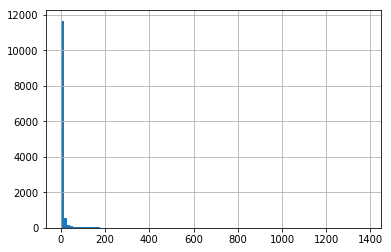

In [107]:
compare[compare['spe'] == 'Oncology / Hematology'].delta_min.hist(bins = 100)

In [108]:
compare[compare['spe'] == 'Oncology / Hematology']

,date,user_id,spe,subspe,time,delta_min
4,2018-08-01,478392,Oncology / Hematology,Hematology/Oncology,00:06:07.960000,6
14,2018-08-01,486403,Oncology / Hematology,Hematology/Oncology,00:01:21.297000,1
16,2018-08-01,491127,Oncology / Hematology,Hematology/Oncology,00:05:26.805000,5
19,2018-08-01,493526,Oncology / Hematology,Hematology/Oncology,00:04:34.491000,4
20,2018-08-01,495061,Oncology / Hematology,Medical Oncology,00:00:00,0
24,2018-08-01,496717,Oncology / Hematology,Hematology/Oncology,00:02:40.697000,2
28,2018-08-01,504710,Oncology / Hematology,Medical Oncology,00:01:48.834000,1
30,2018-08-01,508838,Oncology / Hematology,Medical Oncology,00:00:00,0
41,2018-08-01,517079,Oncology / Hematology,Pediatric Hematology/Oncology,00:06:34.128000,6
43,2018-08-01,518952,Oncology / Hematology,Medical Oncology,00:08:22.452000,8


In [99]:
#compare.delta_min.value_counts()

In [113]:
compare.groupby('spe')['delta_min'].describe()#.to_clipboard()

In [114]:
compare.groupby('subspe')['delta_min'].describe()#.to_clipboard()